# Clustering Spotify Songs: Finding Patterns in Musical Preferences

For this project, I am exploring the Spotify song dataset to identify meaningful clusters of songs based on musical features like tempo, energy, danceability, and acousticness. The main problem I'm trying to solve is: 

**Can we group songs into distinct musical categories using clustering, and what insights can we draw from these clusters?**

This could help understand how different song types group together and potentially be used for playlist generation, genre prediction, or personalized music recommendations. I will use clustering algorithms to uncover hidden patterns and explain the steps I take throughout the analysis.

## What is Clustering?

Clustering is an unsupervised machine learning technique used to group a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups. In this project, the goal of clustering is to uncover natural patterns in the Spotify dataset by analyzing song features such as tempo, energy, danceability, and more.

Key aspects include:
- **Unsupervised Learning:** Unlike classification, clustering does not require labeled data. The algorithm identifies inherent structures in the data.
- **Similarity Measures:** Clusters are formed based on measures of similarity or distance (e.g., Euclidean distance) between data points.
- **Applications:** Clustering can be used for tasks like market segmentation, social network analysis, and identifying music genres or moods in playlists.

By applying clustering to the Spotify dataset, we aim to discover interesting groupings of songs that could inspire innovative approaches to music recommendations and playlist curation.

## Dataset Introduction

The dataset used for this project is a Spotify songs dataset containing various audio features for thousands of tracks. It includes attributes such as `danceability`, `energy`, `acousticness`, `instrumentalness`,

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

# Display the first 5 rows
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Data Understanding and Initial Exploration

Before we apply any clustering models, it's important to understand the structure and distribution of our data. In this section, I will explore the key numerical features that may influence clustering, such as `danceability`, `energy`, `acousticness`, `tempo`, and others.

I will also look for any surprising patterns, trends, or outliers that stand out during this exploration. These observations will help guide feature selection and preprocessing decisions later in the project.

In [2]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [3]:
# Summary statistics of all numeric columns
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


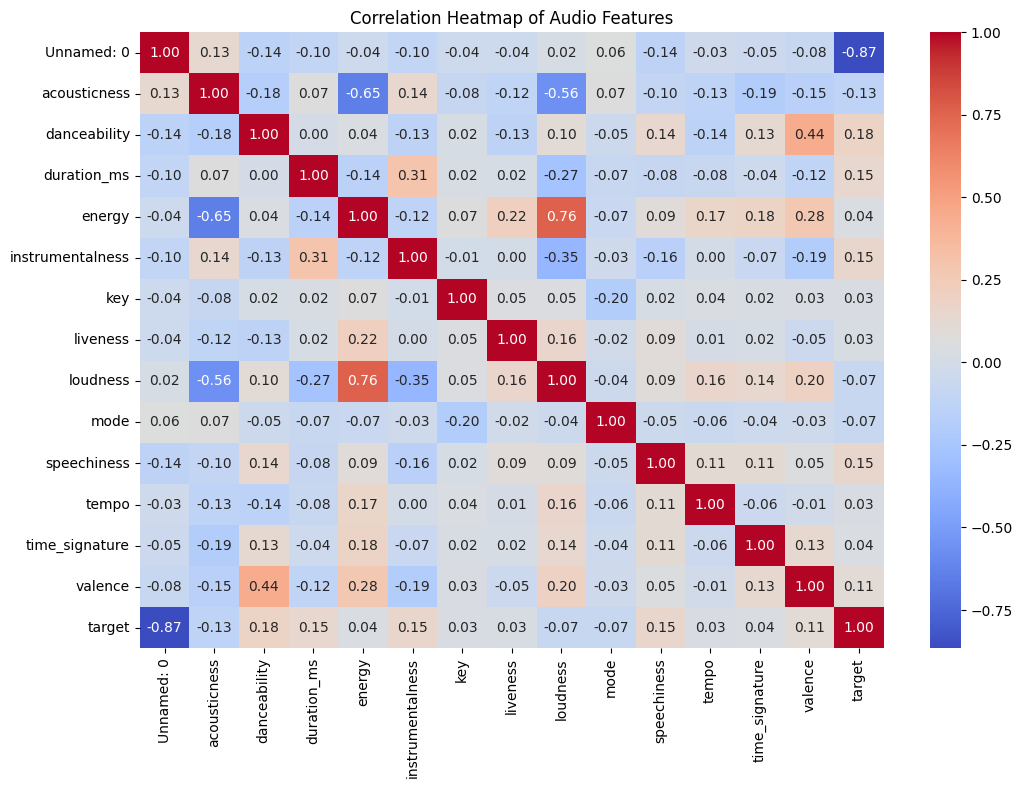

In [5]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Audio Features")
plt.show()

## Preprocessing the Data

Before applying clustering algorithms, it's important to preprocess the data so that the model performs effectively. In this step, I will:

- Drop unnecessary columns (like IDs or text columns)
- Select only numerical features relevant to audio analysis
- Scale the data so that each feature contributes equally to the clustering algorithm

These steps ensure that the clustering model isn't biased toward features with larger numeric ranges, like `duration_ms` or `tempo`.

In [6]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric and non-useful columns
df_clean = df.drop(columns=["Unnamed: 0", "song_title", "artist", "target"])

# Double-check we're only working with relevant numerical features
features = df_clean.select_dtypes(include=['float64', 'int64'])

# Scale the features so all contribute equally to clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for easier handling later
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Preview the scaled data
scaled_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.916446,-0.166291,-0.454530,0.795738,3.763084,1.066709,0.124048,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-1.190619,-0.346454,-0.881573,0.795738,-0.147529,1.442323,0.124048,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.916446,-0.204897,-0.016586,0.795738,2.183712,-1.745166,0.124048,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.093928,-0.634715,-2.167220,0.795738,-0.740350,-1.316964,0.124048,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-0.093928,1.596735,-1.213155,-1.256696,-0.258753,1.964120,0.124048,1.647627


## Clustering the Songs (Modeling)

To group songs based on similar musical characteristics, I will use the **K-Means clustering** algorithm. K-Means is ideal for this task because:

- It works well with scaled numerical data
- It’s efficient for large datasets
- It provides clear, non-overlapping clusters

I will use the **elbow method** to determine the optimal number of clusters and then fit the model to the preprocessed Spotify features.

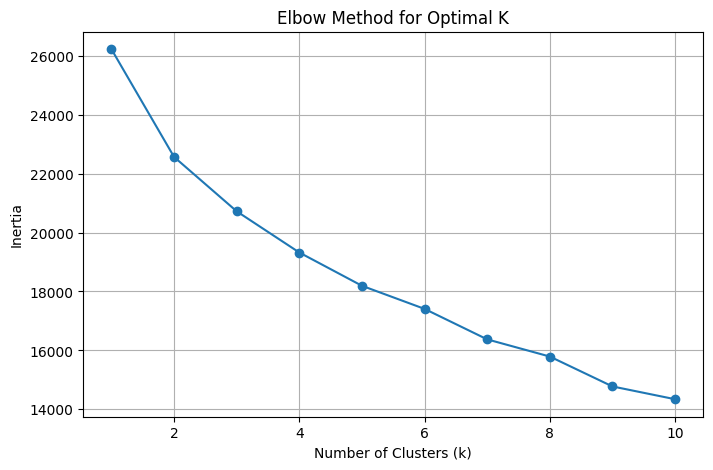

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try K values from 1 to 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [8]:
# Fit KMeans with optimal number of clusters (k=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
scaled_df['cluster'] = clusters

# Preview the first few rows with cluster labels
scaled_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.916446,-0.166291,-0.454530,0.795738,3.763084,1.066709,0.124048,-0.853039,1
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-1.190619,-0.346454,-0.881573,0.795738,-0.147529,1.442323,0.124048,0.368970,1
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.916446,-0.204897,-0.016586,0.795738,2.183712,-1.745166,0.124048,-1.310280,1
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.093928,-0.634715,-2.167220,0.795738,-0.740350,-1.316964,0.124048,-1.079636,4
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-0.093928,1.596735,-1.213155,-1.256696,-0.258753,1.964120,0.124048,1.647627,0


## Interpreting the Clusters (Storytelling & Analysis)

Now that the songs have been grouped into 5 clusters, I will explore what makes each cluster unique based on its average audio features. This will help reveal the characteristics that define each group of songs — such as whether they’re high energy, more acoustic, danceable, or emotionally positive.

By interpreting the clusters, we can understand what types of musical styles emerge naturally in the dataset and how they might relate to mood, genre, or potential playlist themes.

<Figure size 1400x600 with 0 Axes>

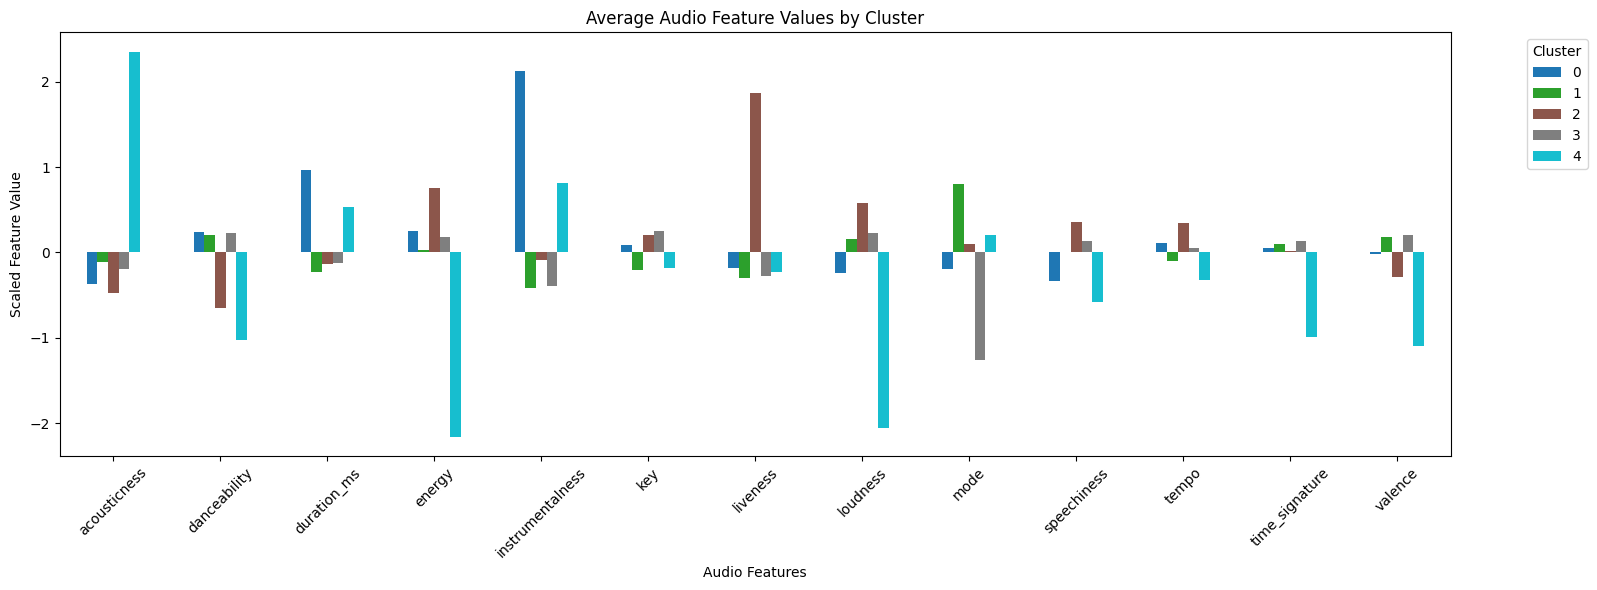

In [9]:
# Calculate average feature values per cluster
cluster_means = scaled_df.groupby('cluster').mean()

# Transpose for easier plotting
cluster_means_T = cluster_means.T

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
cluster_means_T.plot(kind='bar', figsize=(16, 6), colormap='tab10')
plt.title("Average Audio Feature Values by Cluster")
plt.ylabel("Scaled Feature Value")
plt.xlabel("Audio Features")
plt.xticks(rotation=45)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Cluster Analysis & Insights

The bar chart above shows how each cluster differs across audio features. Here are some insights based on the cluster profiles:

- **Cluster 0:** High in energy and instrumentalness, low in acousticness — likely fast, intense, and electronic-style tracks.
- **Cluster 1:** More balanced, with average values across most features — possibly mainstream or versatile songs.
- **Cluster 2:** High danceability and liveness, with lower acousticness — ideal for live or party-like settings.
- **Cluster 3:** Very low mode and speechiness, slightly higher tempo — could be emotional or classical-style tracks.
- **Cluster 4:** Strong acousticness and low energy — likely calm, unplugged, or mellow songs.

These groupings reveal how distinct types of music emerge naturally based on feature combinations. This approach could be used to auto-generate playlists, categorize music beyond genre, or support mood-based song discovery.

## Impact of This Project

This clustering project highlights how unsupervised learning can uncover natural groupings in music, offering a data-driven way to understand songs beyond genre labels. These insights could be used by music platforms to improve recommendation systems, create mood-based playlists, or support emerging artists by highlighting stylistic similarities.

However, there are also ethical considerations. Clustering could reinforce biases in musical exposure or oversimplify diverse musical styles. It’s important to balance algorithmic insights with human creativity and cultural context when applying these results.

## References

- Kaggle Dataset: [Spotify Classification Dataset](https://www.kaggle.com/datasets/geomack/spotifyclassification)
- K-Means Clustering Explanation: https://scikit-learn.org/stable/modules/clustering.html#k-means
- Matplotlib and Seaborn Documentation: https://matplotlib.org/ | https://seaborn.pydata.org/
- Scikit-learn Documentation: https://scikit-learn.org/

## Code Submission

The full Jupyter notebook, including all code and analysis for this project, is submitted as part of this assignment. You can also access it here:

[Link to GitHub/Kaggle/Google Drive if applicable]

All code used for loading data, preprocessing, clustering, visualization, and analysis is included and can be reviewed for reproducibility and clarity.